In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [218]:
df=pd.read_csv("Employee_attrition (3).csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research_and_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_and_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_and_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research_and_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [219]:
# there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [220]:
#separating the data into object and numeric subdatas
data_numeric=df.select_dtypes(exclude='object')
data_object=df.select_dtypes(include='object')

In [221]:
data_numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [222]:
data_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life_Sciences,Female,Sales_Executive,Single,Y,Yes
1,No,Travel_Frequently,Research_and_Development,Life_Sciences,Male,Research_Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research_and_Development,Other,Male,Laboratory_Technician,Single,Y,Yes
3,No,Travel_Frequently,Research_and_Development,Life_Sciences,Female,Research_Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research_and_Development,Medical,Male,Laboratory_Technician,Married,Y,No


In [223]:
#checking for 0 variance
to_be_dropped=[i for  i in data_numeric if data_numeric[i].var()==0]

In [224]:
#here are two variables with 0 variance and they should be dropped
to_be_dropped

['EmployeeCount', 'StandardHours']

In [225]:
data_numeric=data_numeric.drop(columns=to_be_dropped)


In [226]:
#checking to see whether there is object variable with one category
for i in data_object:
    print(data_object[i].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research_and_Development' 'Human_Resources']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
['Female' 'Male']
['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [227]:
#as we see we have one object that has one category "Y",we should drop it
for i in data_object:
    print(i, "\n","====","\n",data_object[i].value_counts())


Attrition 
 ==== 
 No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel 
 ==== 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department 
 ==== 
 Research_and_Development    961
Sales                       446
Human_Resources              63
Name: Department, dtype: int64
EducationField 
 ==== 
 Life_Sciences       606
Medical             464
Marketing           159
Technical_Degree    132
Other                82
Human_Resources      27
Name: EducationField, dtype: int64
Gender 
 ==== 
 Male      882
Female    588
Name: Gender, dtype: int64
JobRole 
 ==== 
 Sales_Executive              326
Research_Scientist           292
Laboratory_Technician        259
Manufacturing_Director       145
Healthcare_Representative    131
Manager                      102
Sales_Representative          83
Research_Director             80
Human_Resources               52
Name: JobRole, dtype: int64
MaritalStatus 
 ==== 
 Marr

In [228]:
del data_object["Over18"]

In [229]:
data_numeric.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [230]:
#now we want to see if variables have correlations,and if they are more than 0.75 we should drop them

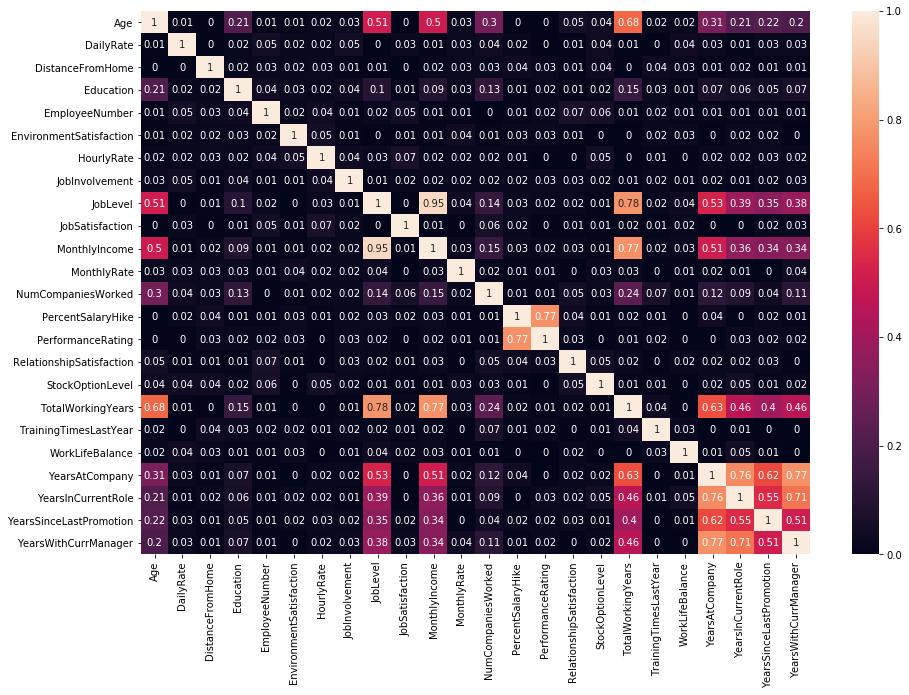

In [231]:
plt.figure(figsize=(15,10))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)

In [232]:
#as we see we have some,so I dropped them

In [233]:
data_numeric=data_numeric.drop(columns=['PerformanceRating','JobLevel','PerformanceRating','TotalWorkingYears','YearsInCurrentRole','YearsInCurrentRole','YearsWithCurrManager'])

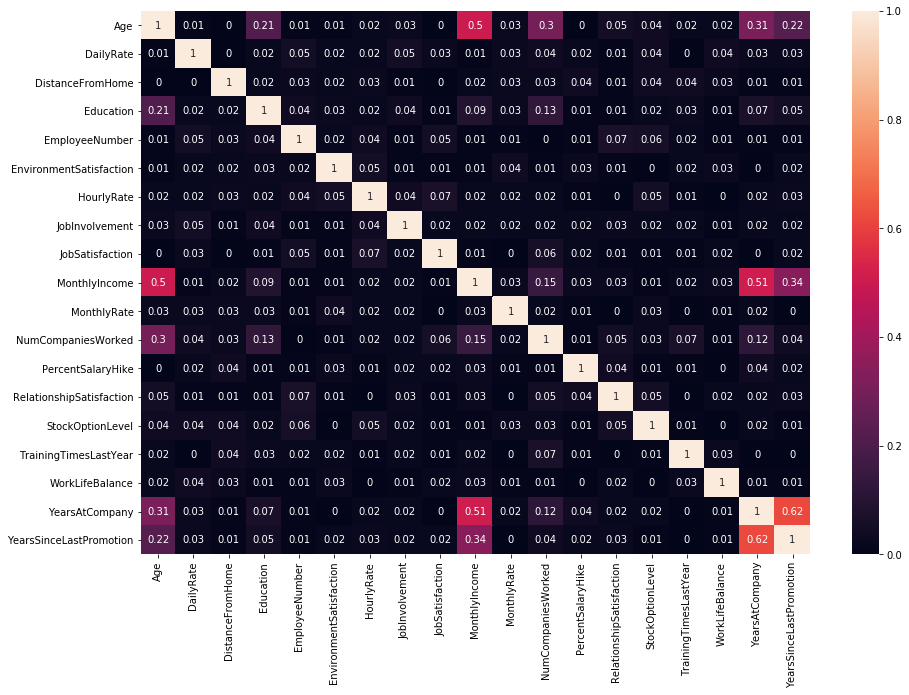

In [234]:
plt.figure(figsize=(15,10))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)# now it's ok with correlations

In [235]:
#converting object variables into dummy variables
data_dummies=pd.get_dummies(data_object,drop_first=True,prefix=data_object.columns)

In [236]:
data_dummies.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_and_Development,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [237]:
data_final=data_numeric.join(data_dummies)# it's our final data

In [238]:
data_dummies.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_and_Development,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [239]:
#now let's see how many of customers were attrited and how many no 
data_final.Attrition_Yes.value_counts()/len(data_final)*100

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

In [240]:
# 83 customers will not churn.This means that without any model we will probably clasify a new record (a new customer) as 0, but we want to do better than this very naive classification.

In [241]:
# Logistic regression

In [242]:
Y=data_final.Attrition_Yes
X=data_final.drop(columns='Attrition_Yes',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [243]:
#to run logit from statsmodel, we should get formula
formula='Y~' + '+'.join(X.columns.tolist())

In [244]:
formula

'Y~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PercentSalaryHike+RelationshipSatisfaction+StockOptionLevel+TrainingTimesLastYear+WorkLifeBalance+YearsAtCompany+YearsSinceLastPromotion+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_Research_and_Development+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [245]:
#using statsmodel for interpretability
logit=Logit.from_formula(formula=formula, data=data_final).fit()


         Current function value: 0.301998
         Iterations: 35


C:\Users\arman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [246]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           40
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                  0.3163
Time:                        23:24:14   Log-Likelihood:                -443.94
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 5.133e-63
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.9336     79.155     -0.075      0.940    -161.075     149.208
Age                                    -0.0437      0.012     -3.600      0.000      -0.068      -0.020
DailyRate                              -0.0003      0.000     -1.557      0.119      -0.001    8.74e-05
DistanceFromHome                        0.0433      0.010      4.127      0.000       0.023       0.064
Education                               0.0003      0.087      0.003      0.997      -0.170       0.170
EmployeeNumber                      -8.891e-05      0.000     -0.603      0.546      -0.000       0.000
EnvironmentSatisfaction                -0.4035      0.081     -4.983      0.000      -0.562      -0.245
HourlyRate                              0.0016      0.004      0.376      0.707      -0.007       0.010
JobInvolvement                         -0.5538      0.120     -4.629      0.000      -0.788      -0.319
JobSatisfaction                        -0.3781      0.079     -4.807      0.000      -0.532      -0.224
MonthlyIncome                       -3.046e-05    5.3e-05     -0.574      0.566      -0.000    7.35e-05
MonthlyRate                          5.767e-06   1.23e-05      0.471      0.638   -1.82e-05    2.98e-05
NumCompaniesWorked                      0.1722      0.037      4.672      0.000       0.100       0.244
PercentSalaryHike                      -0.0163      0.024     -0.669      0.503      -0.064       0.031
RelationshipSatisfaction               -0.2333      0.081     -2.874      0.004      -0.392      -0.074
StockOptionLevel                       -0.2047      0.155     -1.318      0.187      -0.509       0.100
TrainingTimesLastYear                  -0.1694      0.072     -2.354      0.019      -0.310      -0.028
WorkLifeBalance                        -0.3733      0.122     -3.065      0.002      -0.612      -0.135
YearsAtCompany                         -0.0664      0.026     -2.540      0.011      -0.118      -0.015
YearsSinceLastPromotion                 0.1445      0.040      3.598      0.000       0.066       0.223
BusinessTravel_Travel_Frequently        1.8031      0.399      4.514      0.000       1.020       2.586
BusinessTravel_Travel_Rarely            0.9161      0.368      2.488      0.013       0.194       1.638
Department_Research_and_Development     8.3882     79.148      0.106      0.916    -146.739     163.515
Department_Sales                        8.1021     79.149      0.102      0.918    -147.027     163.232
EducationField_Life_Sciences           -0.7070      0.795     -0.890      0.374      -2.264       0.850
EducationField_Marketing               -0.3205      0.842     -0.381      0.703      -1.970       1.330
EducationField_Medical                 -0.7694      0.795     -0.967      0.333      -2.328       0.789
EducationField_Other                   -0.9301      0.857     -1.085      0.278      -2.610       0.750
EducationField_Te

In [247]:
#making summary as dataframe to manipulate easily
log_summary=pd.read_html(logit.summary().tables[1].as_html(),header=0)[0]
log_summary=log_summary.rename(columns={"Unnamed: 0":"Parameter"})
log_summary[["Parameter","coef"]][(log_summary["P>|z|"]<0.05) & (log_summary["coef"]>0)]

,Parameter,coef
3,DistanceFromHome,0.0433
12,NumCompaniesWorked,0.1722
19,YearsSinceLastPromotion,0.1445
20,BusinessTravel_Travel_Frequently,1.8031
31,JobRole_Laboratory_Technician,1.5657
39,MaritalStatus_Single,1.0888
40,OverTime_Yes,1.9234



here are significant variabes that increase posibilities of employee to be in Attrition note for every one-unit increase in numeric variables

In [248]:
#Logit from sklearn for prediction
logit_sk=LogisticRegression()

In [249]:
logit_sk=logit_sk.fit(x_train,y_train)


In [250]:
# accuracy score
logit_sk.score(x_test,y_test)

0.8722826086956522

In [251]:
print(classification_report(y_test,logit_sk.predict(x_test)))#here we see types of errors

             precision    recall  f1-score   support

          0       0.88      0.99      0.93       320
          1       0.60      0.06      0.11        48

avg / total       0.84      0.87      0.82       368



# Decision Tree

In [252]:
#running and fitting DT
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [255]:
#now we can visually see our tree
tree_gr=export_graphviz(tree_1,out_file="tree5.dot", class_names=True, feature_names=X.columns, filled=True) 


In [256]:
#accuracy score
tree_1.score(x_test,y_test)

0.782608695652174

In [257]:
tree_2=DecisionTreeClassifier(max_depth=5,min_samples_leaf=100,random_state=42)
tree_2.fit(x_train,y_train)
tree_2.score(x_test,y_test)

0.8532608695652174

In [263]:
importances=tree_2.feature_importances_
importances=pd.DataFrame(data=importances, index=X.columns, columns=['importances'])


In [264]:
#only fisrt 3  variables have comparatively higher importance, the importance of other variables is lower
importances.sort_values(by="importances", ascending=False)

,importances
OverTime_Yes,0.398835
MonthlyIncome,0.396072
YearsAtCompany,0.131634
StockOptionLevel,0.041264
TrainingTimesLastYear,0.020113
EmployeeNumber,0.007909
HourlyRate,0.003444
NumCompaniesWorked,0.000728
JobRole_Research_Scientist,0.000000
JobRole_Sales_Executive,0.000000


In [258]:
Y_pred=tree_2.predict(x_test)
confusion_matrix(y_test,Y_pred)

array([[304,  16],
       [ 38,  10]], dtype=int64)

In [259]:
accuracy_score(y_test,Y_pred)#recall_score was not working

0.8532608695652174

as we can see our accuracy score get higher when we have cut the tree

In [260]:
#it is our tree_2 grapic
tree_gr2=export_graphviz(tree_2,out_file="tree6.dot", class_names=True, feature_names=X.columns, filled=True) 


we can use here cross validation to have better results and then we can drop that variables which has very very low importance,to have simple model

logit.score-0.87
decision tree score-0.85
as we see they are not different much,we can take Logistic regression model to have higher score,but with decision tree it is more easyer to work